In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Emotion_classify_Data.csv to Emotion_classify_Data (2).csv


In [3]:
emo_df = pd.read_csv('Emotion_classify_Data.csv')

In [4]:
emo_df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [5]:
emo_df.shape

(5937, 2)

In [6]:
emo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [7]:
emo_df.describe(include='all')

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [8]:
# Check for null values
emo_df.isnull().sum()


Comment    0
Emotion    0
dtype: int64

In [9]:
# duplicate checks
emo_df.duplicated().sum()

0

In [10]:
emo_df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [11]:
emo_df['Emotion'].value_counts(normalize=True)

Emotion
anger    0.336870
joy      0.336870
fear     0.326259
Name: proportion, dtype: float64

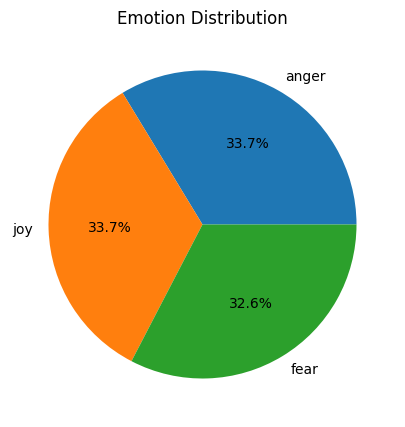

In [12]:
plt.figure(figsize=(10,5))
plt.title('Emotion Distribution')
plt.pie(emo_df['Emotion'].value_counts(), labels=emo_df['Emotion'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [13]:
emo_df['Emotion'].unique()

array(['fear', 'anger', 'joy'], dtype=object)

In [14]:
Tokenizer = Tokenizer()
Tokenizer.fit_on_texts(emo_df['Comment'])
# sequences = Tokenizer.texts_to_sequences(emo_df['Comment'])

In [15]:
max_len = max([len(s.split()) for s in emo_df['Comment']])
max_len

64

In [16]:
len(Tokenizer.word_index)

8979

In [17]:
input_pad = pad_sequences(Tokenizer.texts_to_sequences(emo_df['Comment']), maxlen=max_len, padding='pre')
input_pad.shape

(5937, 64)

In [18]:
emo_df['tokenized_comment'] = list(input_pad)
emo_df.drop('Comment', axis=1, inplace=True)

In [19]:
emo_df= emo_df[['tokenized_comment', 'Emotion']]

print(emo_df)

                                      tokenized_comment Emotion
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    fear
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   anger
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    fear
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     joy
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    fear
...                                                 ...     ...
5932  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    fear
5933  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   anger
5934  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     joy
5935  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...    fear
5936  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   anger

[5937 rows x 2 columns]


In [20]:
X = emo_df['tokenized_comment']
y = emo_df['Emotion']

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 2, 1, 0])

In [22]:
X = np.array(emo_df['tokenized_comment'].tolist())
y = emo_df['Emotion']
y = to_categorical(y.factorize()[0])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4749, 64)
(1188, 64)
(4749, 3)
(1188, 3)


In [24]:
model = Sequential()
model.add(Embedding(8980, 16, input_length=64))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [25]:
# model.summary()

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
149/149 [==============================] - 14s 57ms/step - loss: 1.1085 - accuracy: 0.3826 - val_loss: 1.0416 - val_accuracy: 0.4756
Epoch 2/10
149/149 [==============================] - 9s 61ms/step - loss: 0.8358 - accuracy: 0.6700 - val_loss: 0.6393 - val_accuracy: 0.7744
Epoch 3/10
149/149 [==============================] - 9s 63ms/step - loss: 0.2724 - accuracy: 0.9299 - val_loss: 0.3031 - val_accuracy: 0.9082
Epoch 4/10
149/149 [==============================] - 8s 51ms/step - loss: 0.1336 - accuracy: 0.9667 - val_loss: 0.2497 - val_accuracy: 0.9226
Epoch 5/10
149/149 [==============================] - 9s 60ms/step - loss: 0.0611 - accuracy: 0.9874 - val_loss: 0.3255 - val_accuracy: 0.9007
Epoch 6/10
149/149 [==============================] - 8s 57ms/step - loss: 0.0444 - accuracy: 0.9907 - val_loss: 0.2244 - val_accuracy: 0.9242
Epoch 7/10
149/149 [==============================] - 8s 55ms/step - loss: 0.0281 - accuracy: 0.9954 - val_loss: 0.2428 - val_accuracy: 0.928

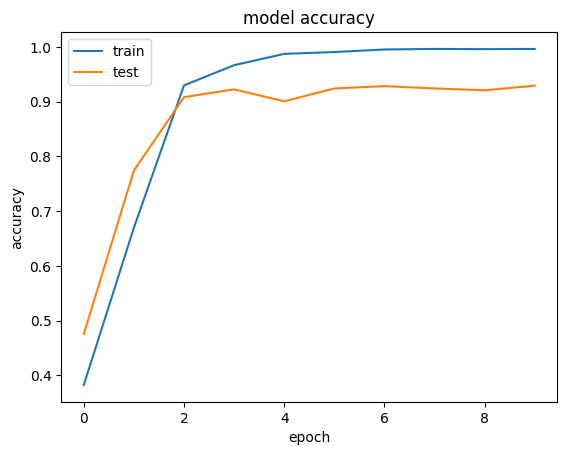

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

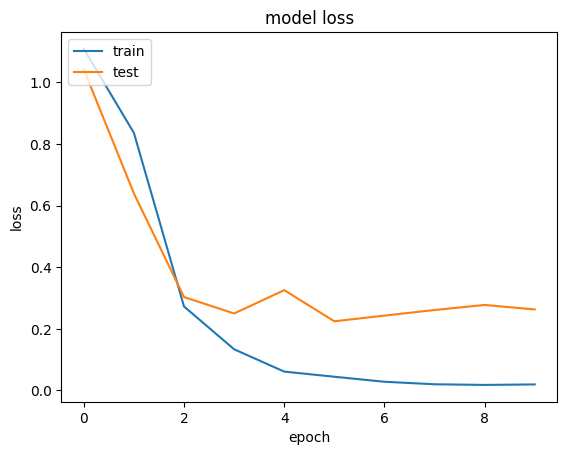

In [29]:
plt.plot(hist.history['loss'], label ='train')
plt.plot(hist.history['val_loss'], label = 'test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}'.format(loss=loss))
print(f'Test Accuracy: {accuracy*100:.2f}%')

38/38 [==============================] - 1s 18ms/step - loss: 0.2629 - accuracy: 0.9293
Test Loss: 0.2629
Test Accuracy: 92.93%


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
report = classification_report(y_true_labels, y_pred_labels)
print(report)

38/38 [==============================] - 1s 18ms/step
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       416
           1       0.93      0.94      0.93       392
           2       0.93      0.92      0.92       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



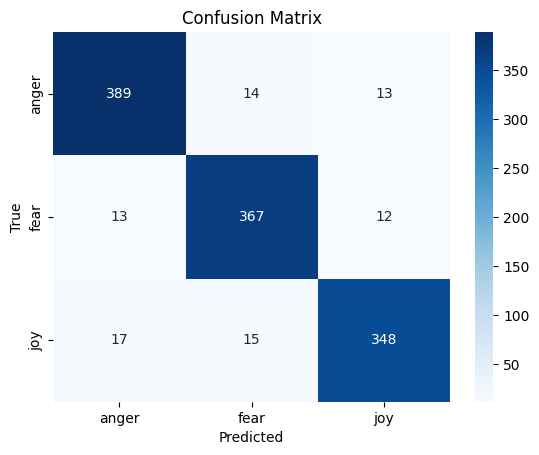

In [32]:
cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm,  annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()